### ResNet Experiments

### Import Module

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from data_utils import RadiographyDataset, train_model, produce_stats
from model import ResNet

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5], std=[0.5]) 
])

### Data Loading

In [4]:
train_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="train")
test_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="test")
val_dataset = RadiographyDataset(metadata_path = "metadata.csv", transform=transform, file_type="val")

In [5]:
trainloader = DataLoader(train_dataset, batch_size=32, num_workers=8, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=32, num_workers=8, shuffle=False)
valloader = DataLoader(val_dataset, batch_size=32, num_workers=8, shuffle=False)

In [6]:
# resnet with 50 % freeze
model18 = ResNet(model_name='resnet18', pretrained=True, freeze_half=True, num_classes=4).to(device)
model34 = ResNet(model_name='resnet34', pretrained=True, freeze_half=True, num_classes=4).to(device)

# resnet all freeze
model18_freeze = ResNet(model_name='resnet18', pretrained=True, freeze_half=False, num_classes=4).to(device)
model34_freeze = ResNet(model_name='resnet34', pretrained=True, freeze_half=False, num_classes=4).to(device)

# resnet unpretrained
model18_unpretrained = ResNet(model_name='resnet18', pretrained=False, freeze_half=False, num_classes=4).to(device)
model34_unpretrained = ResNet(model_name='resnet34', pretrained=False, freeze_half=False, num_classes=4).to(device)

c:\Users\hwasu\miniconda3\envs\bme_final\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hwasu\miniconda3\envs\bme_final\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\hwasu\miniconda3\envs\bme_final\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=

#### ResNet18 50% freeze fine tuning model18_2

Epoch 1/10, Train Loss: 0.4189, Val Loss: 0.3645


Epoch 2/10, Train Loss: 0.2677, Val Loss: 0.3550


Epoch 3/10, Train Loss: 0.2261, Val Loss: 0.3029


Epoch 4/10, Train Loss: 0.1898, Val Loss: 0.2049


Epoch 5/10, Train Loss: 0.1653, Val Loss: 0.2701


Epoch 6/10, Train Loss: 0.1435, Val Loss: 0.3178


Epoch 7/10, Train Loss: 0.1185, Val Loss: 0.2526


Epoch 8/10, Train Loss: 0.0913, Val Loss: 0.2370


Epoch 9/10, Train Loss: 0.0843, Val Loss: 0.2765


Epoch 10/10, Train Loss: 0.0625, Val Loss: 0.3057


Test Loss: 0.2868, Test Accuracy: 0.9283


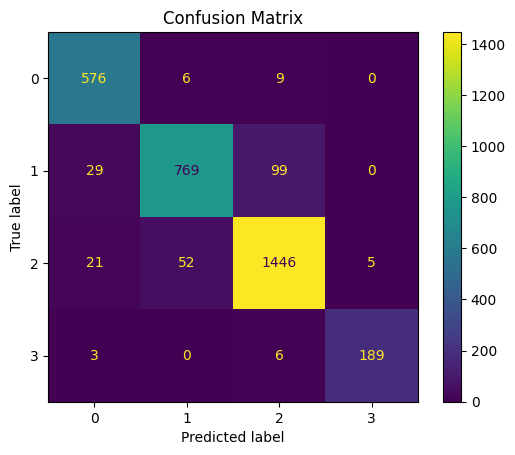

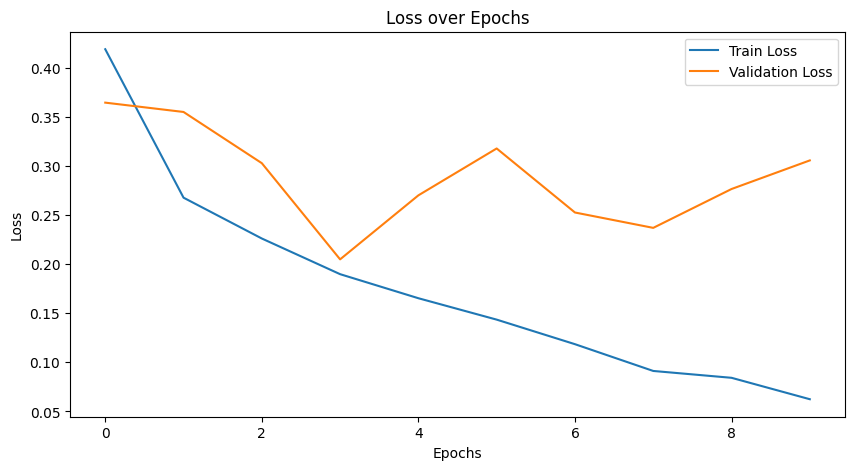

In [7]:
model18_trained, train_loss_18, val_loss_18 = train_model(model18, trainloader, valloader, device)
model18_dict = produce_stats(model18_trained, testloader, train_loss_18, val_loss_18, device)

#### ResNet34 50% freeze fine tuning model34_2

Epoch 1/10, Train Loss: 0.4455, Val Loss: 0.3724


Epoch 2/10, Train Loss: 0.2840, Val Loss: 0.3569


Epoch 3/10, Train Loss: 0.2320, Val Loss: 0.2792


Epoch 4/10, Train Loss: 0.2082, Val Loss: 0.4480


Epoch 5/10, Train Loss: 0.1759, Val Loss: 0.2322


Epoch 6/10, Train Loss: 0.1463, Val Loss: 0.2188


Epoch 7/10, Train Loss: 0.1182, Val Loss: 0.3203


Epoch 8/10, Train Loss: 0.1039, Val Loss: 0.2964


Epoch 9/10, Train Loss: 0.0874, Val Loss: 0.2638


Epoch 10/10, Train Loss: 0.0708, Val Loss: 0.3318


Test Loss: 0.3499, Test Accuracy: 0.9034


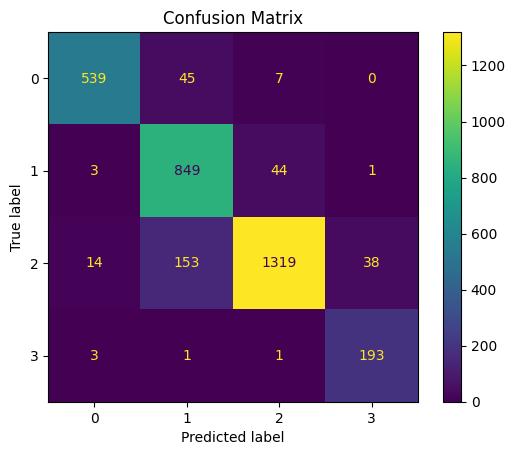

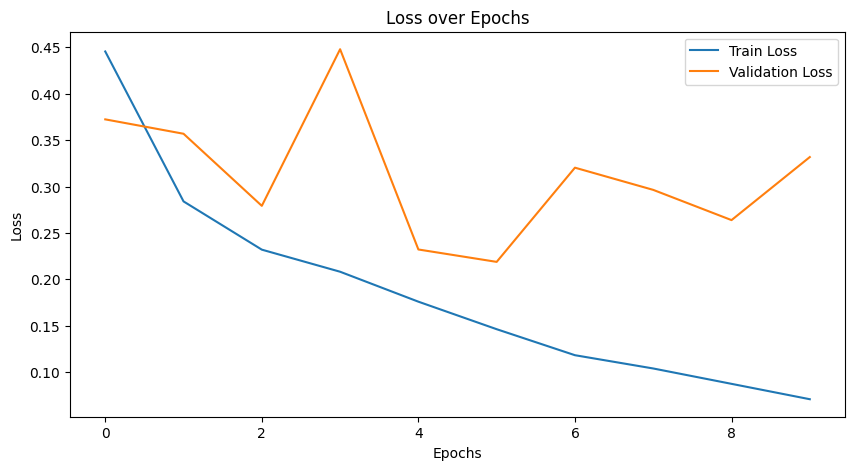

In [8]:
model34_trained, train_loss_34, val_loss_34 = train_model(model34, trainloader, valloader, device)
model34_dict = produce_stats(model34_trained, testloader, train_loss_34, val_loss_34, device)

#### ResNet18 without fine-tuning model18_1 (just classification head)

Epoch 1/10, Train Loss: 0.4284, Val Loss: 0.4595


Epoch 2/10, Train Loss: 0.2744, Val Loss: 0.2653


Epoch 3/10, Train Loss: 0.2240, Val Loss: 0.2447


Epoch 4/10, Train Loss: 0.1854, Val Loss: 0.2560


Epoch 5/10, Train Loss: 0.1694, Val Loss: 0.2529


Epoch 6/10, Train Loss: 0.1458, Val Loss: 0.2199


Epoch 7/10, Train Loss: 0.1147, Val Loss: 0.4411


Epoch 8/10, Train Loss: 0.0982, Val Loss: 0.3586


Epoch 9/10, Train Loss: 0.0773, Val Loss: 0.2637


Epoch 10/10, Train Loss: 0.0777, Val Loss: 0.2467


Test Loss: 0.2348, Test Accuracy: 0.9299


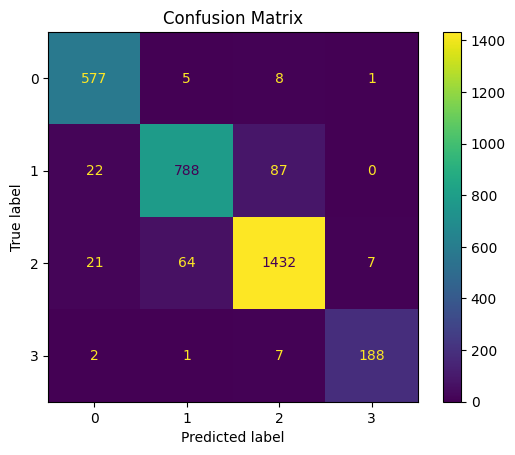

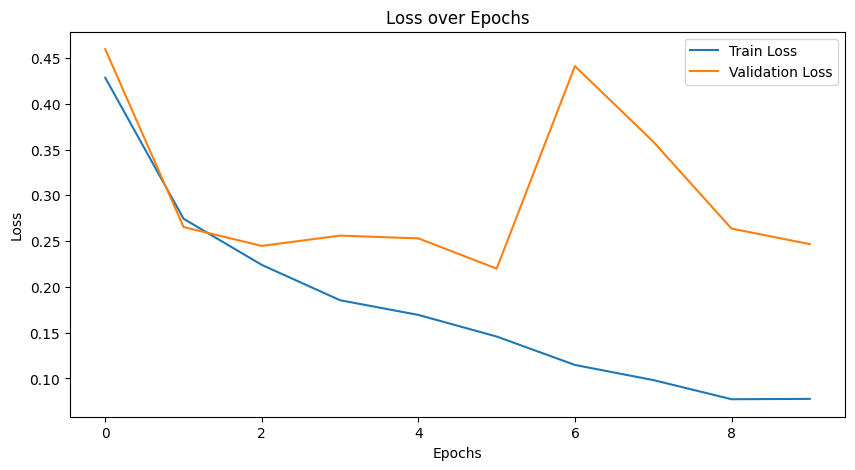

In [9]:
model18_trained_freeze, train_loss_18_freeze, val_loss_18_freeze = train_model(model18_freeze, trainloader, valloader, device)
model18_freeze_dict = produce_stats(model18_trained_freeze, testloader, train_loss_18_freeze, val_loss_18_freeze, device)

#### ResNet34 without fine-tuning model34_1

Epoch 1/10, Train Loss: 0.4443, Val Loss: 0.3547


Epoch 2/10, Train Loss: 0.2934, Val Loss: 0.3056


Epoch 3/10, Train Loss: 0.2326, Val Loss: 0.2457


Epoch 4/10, Train Loss: 0.2003, Val Loss: 0.3380


Epoch 5/10, Train Loss: 0.1755, Val Loss: 0.2456


Epoch 6/10, Train Loss: 0.1508, Val Loss: 0.2506


Epoch 7/10, Train Loss: 0.1285, Val Loss: 0.2169


Epoch 8/10, Train Loss: 0.1222, Val Loss: 0.2633


Epoch 9/10, Train Loss: 0.0877, Val Loss: 0.3844


Epoch 10/10, Train Loss: 0.0732, Val Loss: 0.2598


Test Loss: 0.2639, Test Accuracy: 0.9143


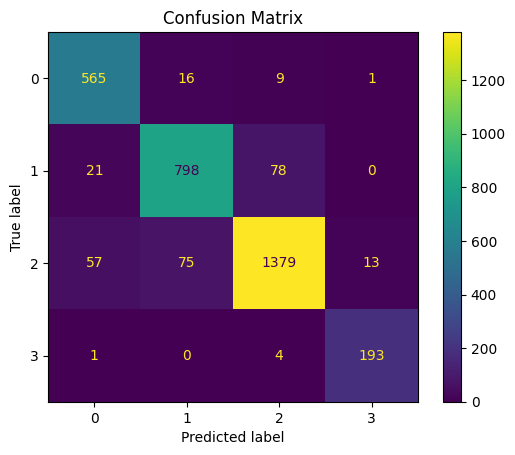

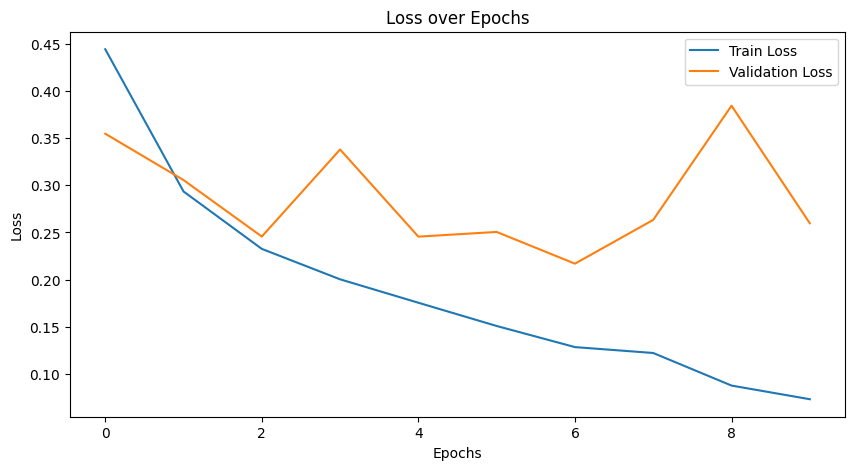

In [10]:
model34_trained_freeze, train_loss_34_freeze, val_loss_34_freeze = train_model(model34_freeze, trainloader, valloader, device)
model34_freeze_dict = produce_stats(model34_trained_freeze, testloader, train_loss_34_freeze, val_loss_34_freeze, device)

#### ResNet18 without pretrained model18_3

Epoch 1/10, Train Loss: 0.6767, Val Loss: 0.4647


Epoch 2/10, Train Loss: 0.4364, Val Loss: 0.3696


Epoch 3/10, Train Loss: 0.3429, Val Loss: 0.4762


Epoch 4/10, Train Loss: 0.2890, Val Loss: 0.3046


Epoch 5/10, Train Loss: 0.2544, Val Loss: 0.2881


Epoch 6/10, Train Loss: 0.2250, Val Loss: 0.2516


Epoch 7/10, Train Loss: 0.2079, Val Loss: 0.2731


Epoch 8/10, Train Loss: 0.1848, Val Loss: 0.2454


Epoch 9/10, Train Loss: 0.1695, Val Loss: 0.2626


Epoch 10/10, Train Loss: 0.1499, Val Loss: 0.2337


Test Loss: 0.2276, Test Accuracy: 0.9190


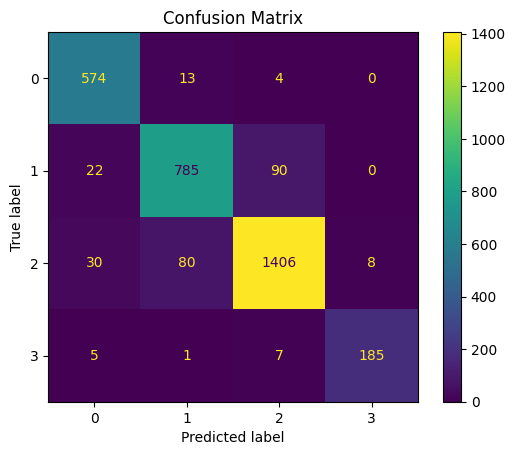

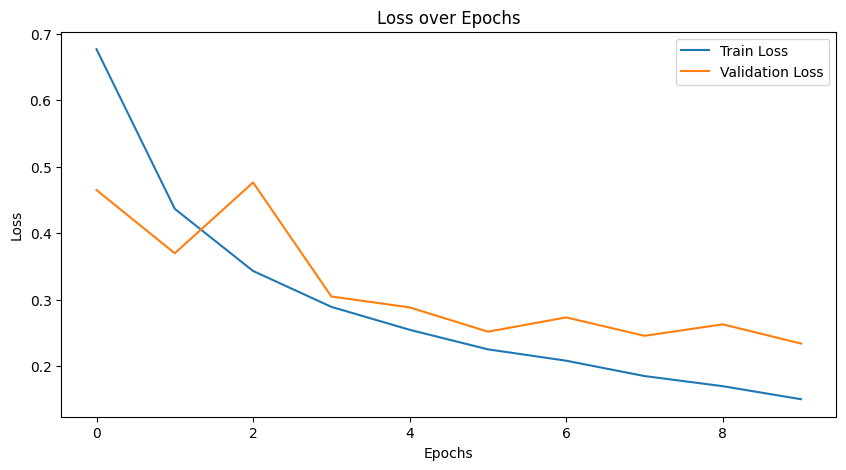

In [11]:
model18_trained_unpretrained, train_loss_18_unpretrained, val_loss_18_unpretrained = train_model(model18_unpretrained, trainloader, valloader, device)
model18_unpretrained_dict = produce_stats(model18_trained_unpretrained, testloader, train_loss_18_unpretrained, val_loss_18_unpretrained, device)

#### ResNet34 without pretrained model34_3

Epoch 1/10, Train Loss: 0.6251, Val Loss: 0.4859


Epoch 2/10, Train Loss: 0.4312, Val Loss: 0.3871


Epoch 3/10, Train Loss: 0.3664, Val Loss: 0.3252


Epoch 4/10, Train Loss: 0.3145, Val Loss: 0.3352


Epoch 5/10, Train Loss: 0.2736, Val Loss: 0.2563


Epoch 6/10, Train Loss: 0.2481, Val Loss: 0.2935


Epoch 7/10, Train Loss: 0.2298, Val Loss: 0.2489


Epoch 8/10, Train Loss: 0.2058, Val Loss: 0.2321


Epoch 9/10, Train Loss: 0.1834, Val Loss: 0.2511


Epoch 10/10, Train Loss: 0.1656, Val Loss: 0.2563


Test Loss: 0.2582, Test Accuracy: 0.9199


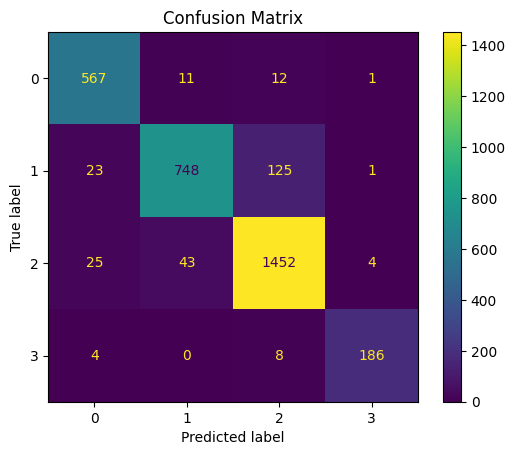

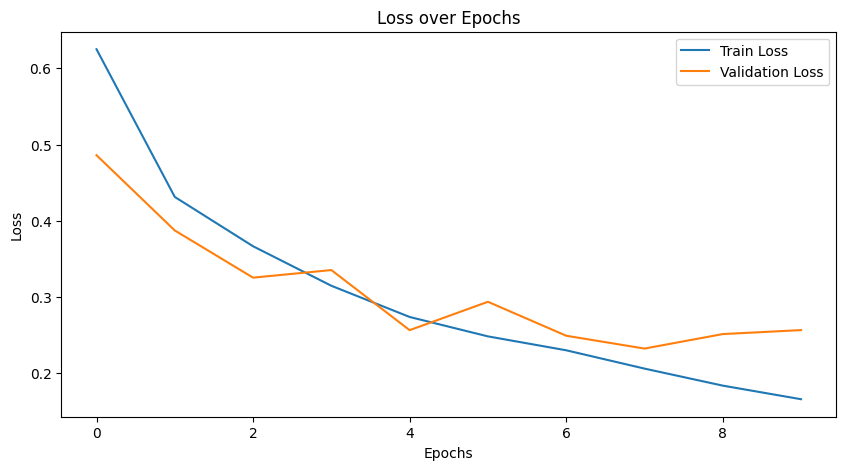

In [12]:
model34_trained_unpretrained, train_loss_34_unpretrained, val_loss_34_unpretrained = train_model(model34_unpretrained, trainloader, valloader, device)
model34_unpretrained_dict = produce_stats(model34_trained_unpretrained, testloader, train_loss_34_unpretrained, val_loss_34_unpretrained, device)

#### Save model

In [14]:
torch.save(model18_dict, "model/model18_1.pt")
torch.save(model18_freeze_dict, "model/model18_2.pt")
torch.save(model18_unpretrained_dict, "model/model18_3.pt")

torch.save(model34_dict, "model/model34_1.pt")
torch.save(model34_freeze_dict, "model/model34_2.pt")
torch.save(model34_unpretrained_dict, "model/model34_3.pt")